In [152]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Priyanshul\OneDrive\Desktop\Handwritten\hair_loss\Predict Hair Fall.csv")

In [3]:
data.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [182]:
data.tail()

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
994,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,1
995,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,Yes,0
996,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,1
997,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,1
998,Yes,Yes,Psoriasis,Blood Pressure Medication,Vitamin D Deficiency,Low,34,No,Yes,No,No,1


In [5]:
data.shape

(999, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64

In [9]:
data = data.drop('Id',axis=1)
data.head()

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [10]:
data_eda = data.copy()
data_eda.head()

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [11]:
label_hair={0:'No',1:'Yes'}
data_eda['Hair Loss']=data_eda['Hair Loss'].map(label_hair)
data_eda.head()

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,No
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,No
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,No
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,No
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,Yes


In [12]:
numerical_feature = 'Age'
categorical_features = data_eda.select_dtypes(include=['object','category']).columns.to_list()

In [13]:
categorical_features

['Genetics',
 'Hormonal Changes',
 'Medical Conditions',
 'Medications & Treatments',
 'Nutritional Deficiencies ',
 'Stress',
 'Poor Hair Care Habits ',
 'Environmental Factors',
 'Smoking',
 'Weight Loss ',
 'Hair Loss']

In [14]:
print(f'Total categorical features: {len(categorical_features)}')

Total categorical features: 11


In [15]:
for i in categorical_features:
    print(f"{i}:{data_eda[i].unique()}")

Genetics:['Yes' 'No']
Hormonal Changes:['No' 'Yes']
Medical Conditions:['No Data' 'Eczema' 'Dermatosis' 'Ringworm' 'Psoriasis' 'Alopecia Areata '
 'Scalp Infection' 'Seborrheic Dermatitis' 'Dermatitis' 'Thyroid Problems'
 'Androgenetic Alopecia']
Medications & Treatments:['No Data' 'Antibiotics' 'Antifungal Cream' 'Accutane' 'Chemotherapy'
 'Steroids' 'Rogaine' 'Blood Pressure Medication' 'Immunomodulators'
 'Antidepressants ' 'Heart Medication ']
Nutritional Deficiencies :['Magnesium deficiency' 'Protein deficiency' 'Biotin Deficiency '
 'Iron deficiency' 'Selenium deficiency' 'Omega-3 fatty acids'
 'Zinc Deficiency' 'Vitamin A Deficiency' 'Vitamin D Deficiency' 'No Data'
 'Vitamin E deficiency']
Stress:['Moderate' 'High' 'Low']
Poor Hair Care Habits :['Yes' 'No']
Environmental Factors:['Yes' 'No']
Smoking:['No' 'Yes']
Weight Loss :['No' 'Yes']
Hair Loss:['No' 'Yes']


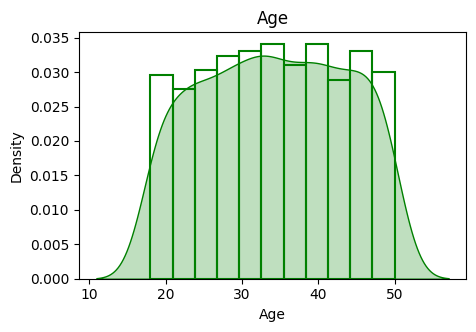

In [16]:
plt.figure(figsize=(5,3.2))
sns.kdeplot(data_eda,x=numerical_feature,fill=True,color='green')
sns.histplot(data_eda,x=numerical_feature,stat='density',fill=False,color='green')
plt.title(f"{numerical_feature}",color='black')
plt.show()

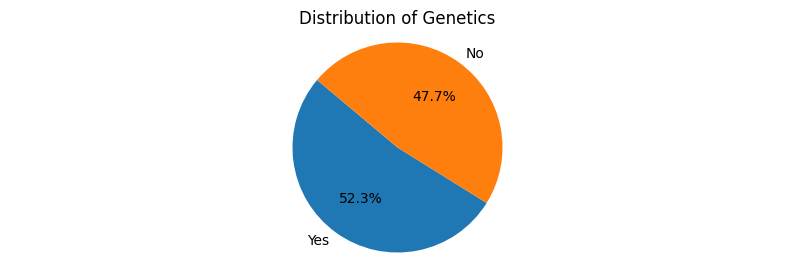

In [30]:
counts = data_eda[categorical_features[0]].value_counts()
plt.figure(figsize=(10, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Distribution of {categorical_features[0]}")
plt.axis('equal')  
plt.show()

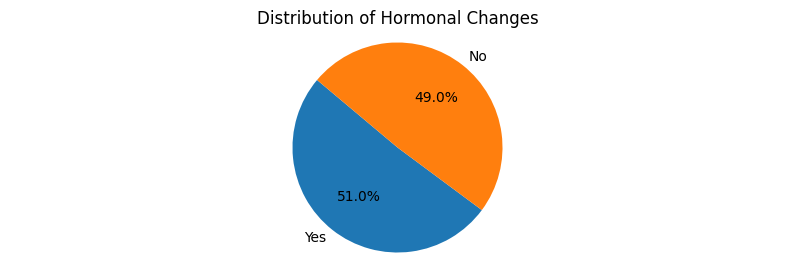

In [31]:
counts = data_eda[categorical_features[1]].value_counts()
plt.figure(figsize=(10, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Distribution of {categorical_features[1]}")
plt.axis('equal')  
plt.show()

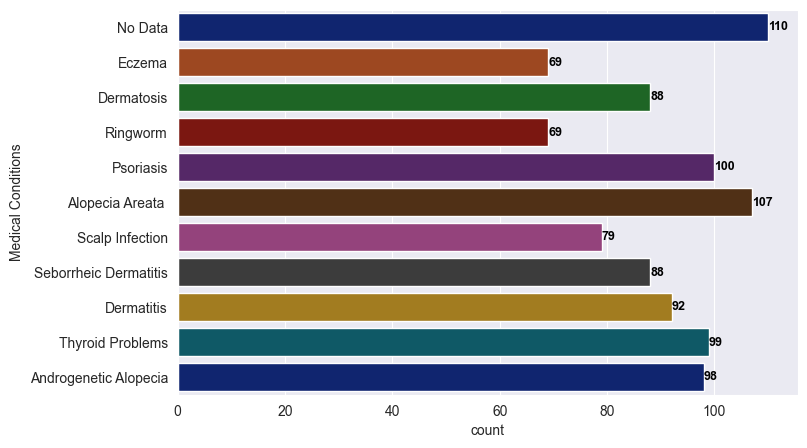

In [39]:
sns.set_style("darkgrid")
fig,ax = plt.subplots(figsize = (8,5))
ax = sns.countplot(data_eda, y = categorical_features[2], hue=categorical_features[2],palette = 'dark')

for bars in ax.containers:
    ax.bar_label(bars, fontsize = 9, fontweight = 'bold', color = 'black')

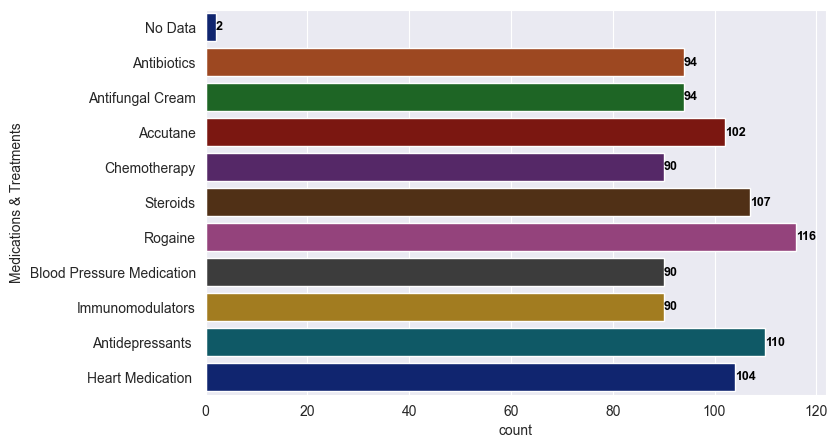

In [44]:
sns.set_style('darkgrid')
fig,ax= plt.subplots(figsize=(8,5))
ax=sns.countplot(data_eda,y=categorical_features[3],hue=categorical_features[3],palette='dark')
for bars in ax.containers:
    ax.bar_label(bars,fontsize=9,fontweight = 'bold', color = 'black')

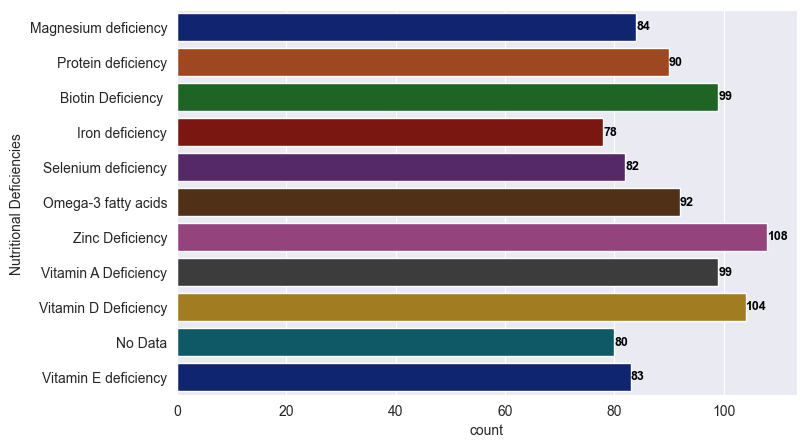

In [45]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(8,5))
ax=sns.countplot(data_eda,y=categorical_features[4],hue=categorical_features[4],palette='dark')
for bars in ax.containers:
    ax.bar_label(bars,fontsize=9,fontweight = 'bold', color = 'black')

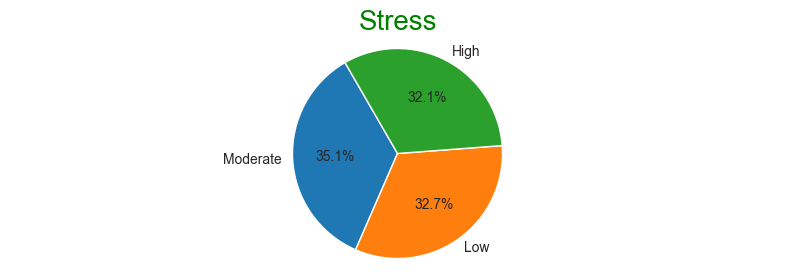

In [54]:
counts=data_eda[categorical_features[5]].value_counts()
plt.figure(figsize=(10,3))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=120)
plt.title(f"{categorical_features[5]}",color='green',fontsize=20)
plt.axis('equal')
plt.show()

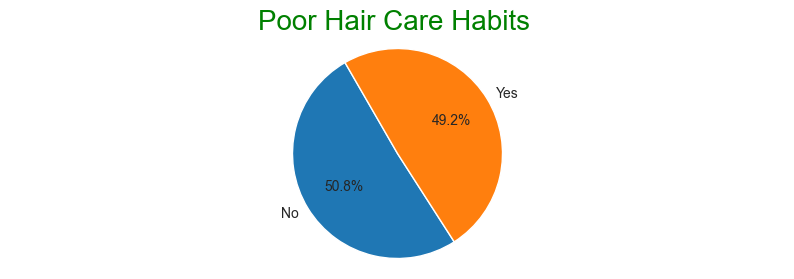

In [55]:
counts=data_eda[categorical_features[6]].value_counts()
plt.figure(figsize=(10,3))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=120)
plt.title(f"{categorical_features[6]}",color='green',fontsize=20)
plt.axis('equal')
plt.show()

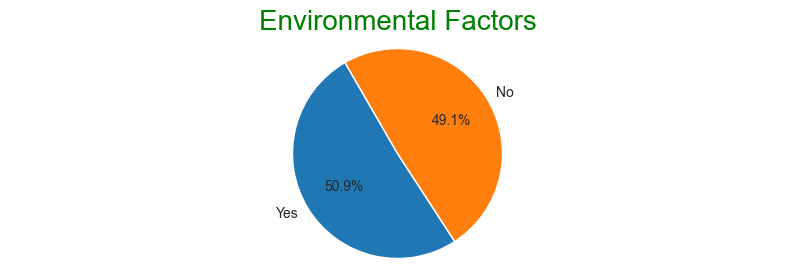

In [56]:
counts=data_eda[categorical_features[7]].value_counts()
plt.figure(figsize=(10,3))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=120)
plt.title(f"{categorical_features[7]}",color='green',fontsize=20)
plt.axis('equal')
plt.show()

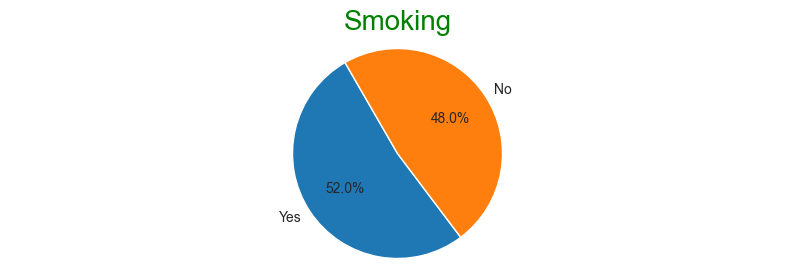

In [57]:
counts=data_eda[categorical_features[8]].value_counts()
plt.figure(figsize=(10,3))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=120)
plt.title(f"{categorical_features[8]}",color='green',fontsize=20)
plt.axis('equal')
plt.show()

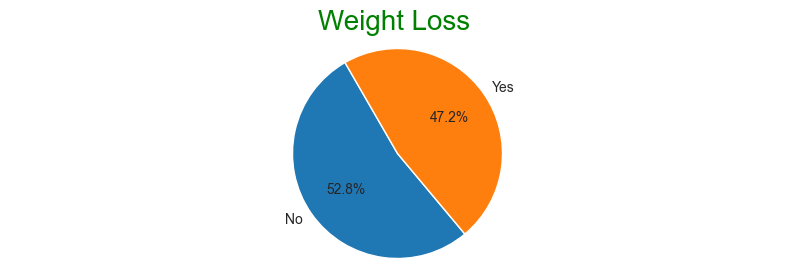

In [58]:
counts=data_eda[categorical_features[9]].value_counts()
plt.figure(figsize=(10,3))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=120)
plt.title(f"{categorical_features[9]}",color='green',fontsize=20)
plt.axis('equal')
plt.show()

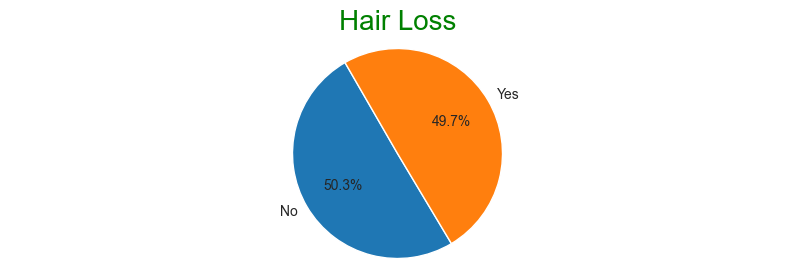

In [59]:
counts=data_eda[categorical_features[10]].value_counts()
plt.figure(figsize=(10,3))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=120)
plt.title(f"{categorical_features[10]}",color='green',fontsize=20)
plt.axis('equal')
plt.show()

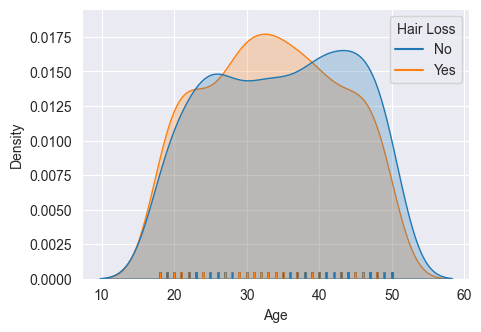

In [62]:
fig,ax=plt.subplots(figsize=(5,3.5))
sns.kdeplot(data_eda,x=numerical_feature,hue="Hair Loss",fill=True,ax=ax)
sns.rugplot(data_eda,x="Age",hue="Hair Loss",ax=ax)
plt.show()

In [64]:
data_eda.groupby('Hair Loss')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Hair Loss,,,,,,,,
No,502.0,34.770916,9.592356,18.0,26.0,35.0,43.0,50.0
Yes,497.0,33.599598,9.128266,18.0,26.0,33.0,41.0,50.0


<Figure size 400x200 with 0 Axes>

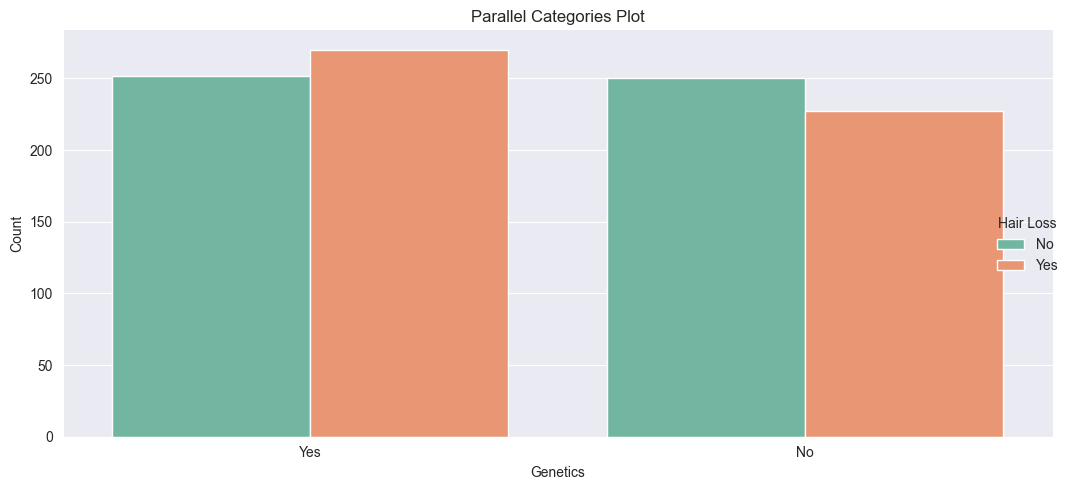

In [81]:
plt.figure(figsize=(4, 2))
sns.catplot(data=data_eda, kind='count', x=categorical_features[0], hue=categorical_features[10], aspect=2, palette='Set2')

plt.xlabel(categorical_features[0])
plt.ylabel("Count")
plt.title("Parallel Categories Plot")

plt.tight_layout()
plt.show()

In [78]:
pd.crosstab(data[categorical_features[0]], data[categorical_features[10]])

Hair Loss,0,1
Genetics,,
No,250,227
Yes,252,270


<Figure size 400x200 with 0 Axes>

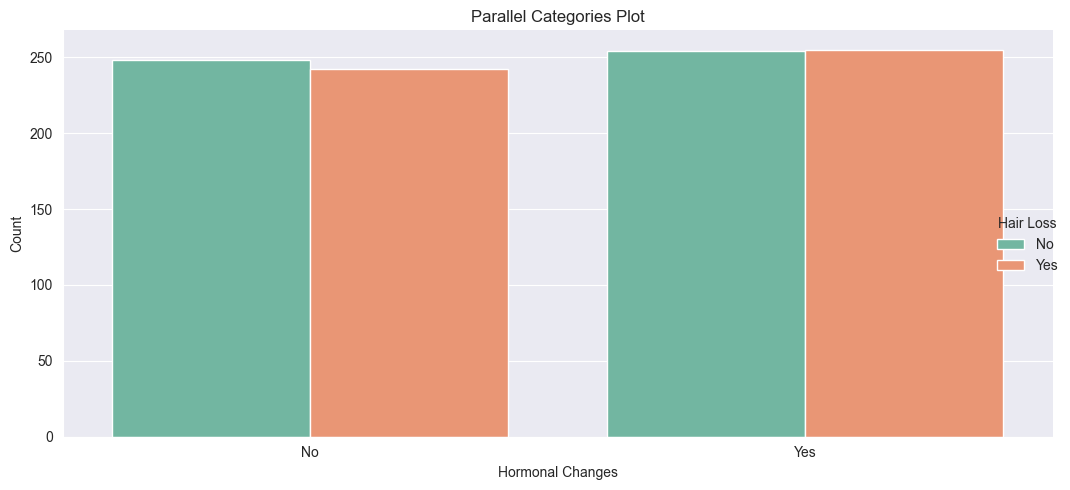

In [86]:
plt.figure(figsize=(4, 2))
sns.catplot(data=data_eda, kind='count', x=categorical_features[1], hue=categorical_features[10], aspect=2, palette='Set2')

plt.xlabel(categorical_features[1])
plt.ylabel("Count")
plt.title("Parallel Categories Plot")

plt.tight_layout()
plt.show()

In [83]:
pd.crosstab(data[categorical_features[1]], data[categorical_features[10]])

Hair Loss,0,1
Hormonal Changes,,
No,248,242
Yes,254,255


<Figure size 400x200 with 0 Axes>

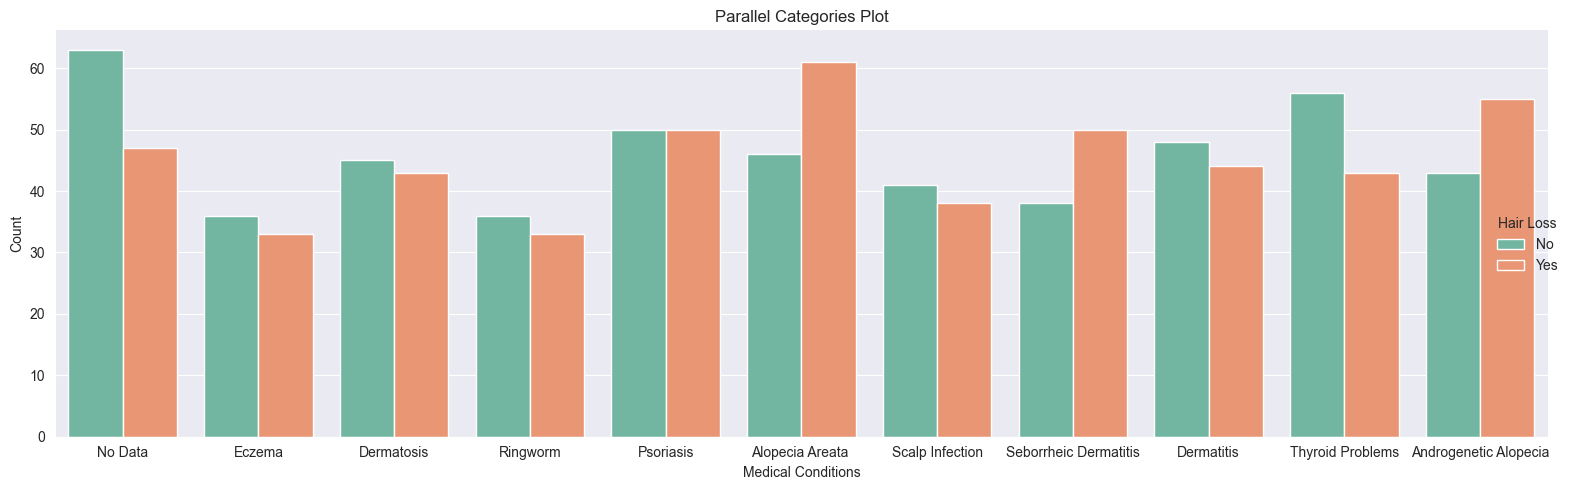

In [92]:
plt.figure(figsize=(4, 2))
sns.catplot(data=data_eda, kind='count', x=categorical_features[2], hue=categorical_features[10], aspect=3, palette='Set2')

plt.xlabel(categorical_features[2])
plt.ylabel("Count")
plt.title("Parallel Categories Plot")

plt.tight_layout()
plt.show()

In [94]:
pd.crosstab(data[categorical_features[2]],data[categorical_features[10]])

Hair Loss,0,1
Medical Conditions,,
Alopecia Areata,46,61
Androgenetic Alopecia,43,55
Dermatitis,48,44
Dermatosis,45,43
Eczema,36,33
No Data,63,47
Psoriasis,50,50
Ringworm,36,33
Scalp Infection,41,38


<Figure size 400x200 with 0 Axes>

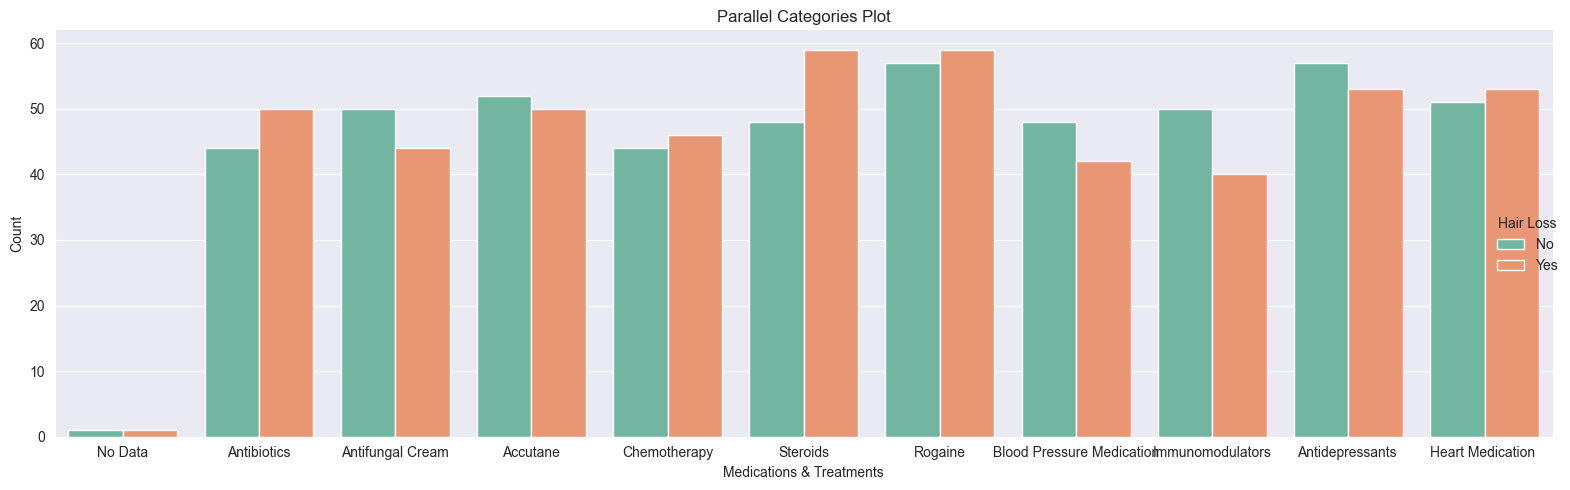

In [95]:
plt.figure(figsize=(4, 2))
sns.catplot(data=data_eda, kind='count', x=categorical_features[3], hue=categorical_features[10], aspect=3, palette='Set2')

plt.xlabel(categorical_features[3])
plt.ylabel("Count")
plt.title("Parallel Categories Plot")

plt.tight_layout()
plt.show()

In [96]:
pd.crosstab(data[categorical_features[3]],data[categorical_features[10]])

Hair Loss,0,1
Medications & Treatments,,
Accutane,52,50
Antibiotics,44,50
Antidepressants,57,53
Antifungal Cream,50,44
Blood Pressure Medication,48,42
Chemotherapy,44,46
Heart Medication,51,53
Immunomodulators,50,40
No Data,1,1


<Figure size 400x200 with 0 Axes>

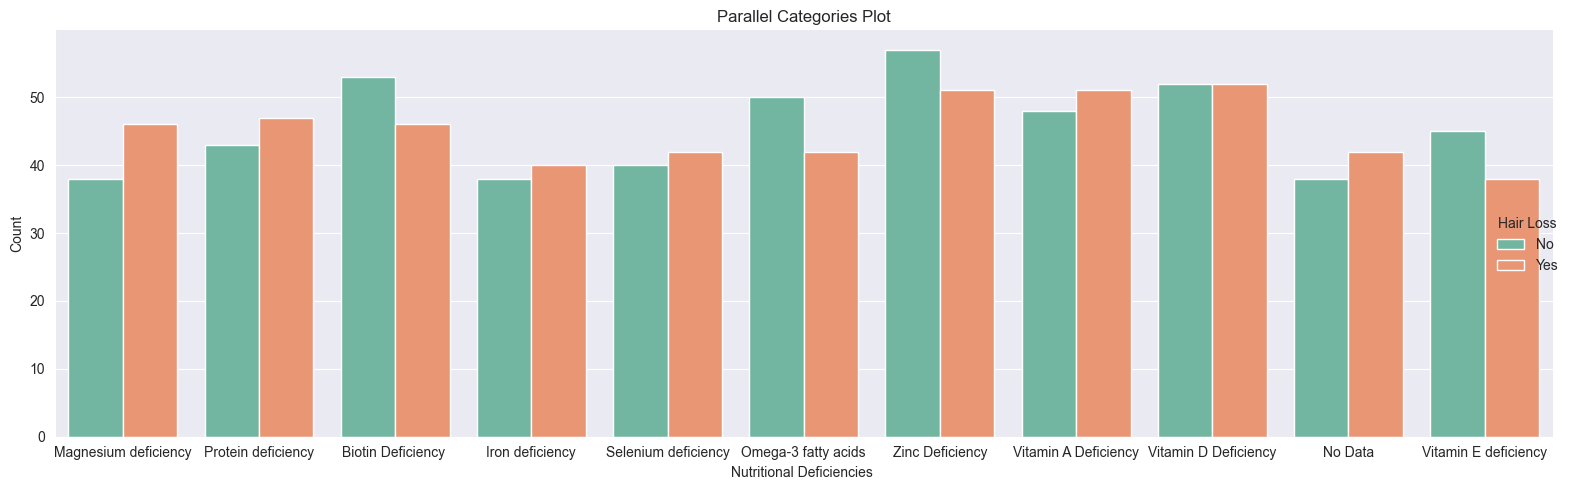

In [98]:
plt.figure(figsize=(4, 2))
sns.catplot(data=data_eda, kind='count', x=categorical_features[4], hue=categorical_features[10], aspect=3, palette='Set2')

plt.xlabel(categorical_features[4])
plt.ylabel("Count")
plt.title("Parallel Categories Plot")

plt.tight_layout()
plt.show()

In [99]:
pd.crosstab(data[categorical_features[4]],data[categorical_features[10]])

Hair Loss,0,1
Nutritional Deficiencies,,
Biotin Deficiency,53,46
Iron deficiency,38,40
Magnesium deficiency,38,46
No Data,38,42
Omega-3 fatty acids,50,42
Protein deficiency,43,47
Selenium deficiency,40,42
Vitamin A Deficiency,48,51
Vitamin D Deficiency,52,52


<Figure size 400x200 with 0 Axes>

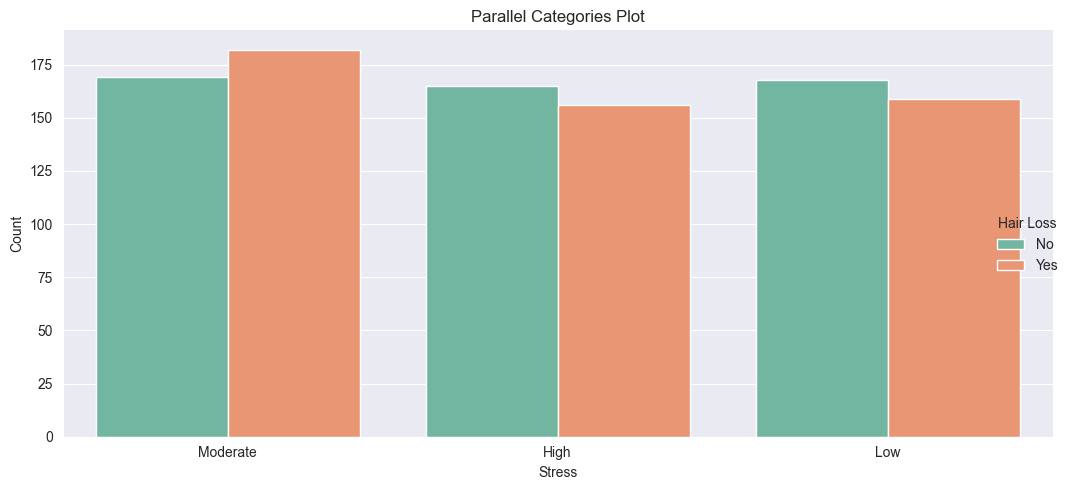

In [101]:
plt.figure(figsize=(4, 2))
sns.catplot(data=data_eda, kind='count', x=categorical_features[5], hue=categorical_features[10], aspect=2, palette='Set2')

plt.xlabel(categorical_features[5])
plt.ylabel("Count")
plt.title("Parallel Categories Plot")

plt.tight_layout()
plt.show()

In [103]:
pd.crosstab(data[categorical_features[5]],data[categorical_features[10]])

Hair Loss,0,1
Stress,,
High,165,156
Low,168,159
Moderate,169,182


<Figure size 400x200 with 0 Axes>

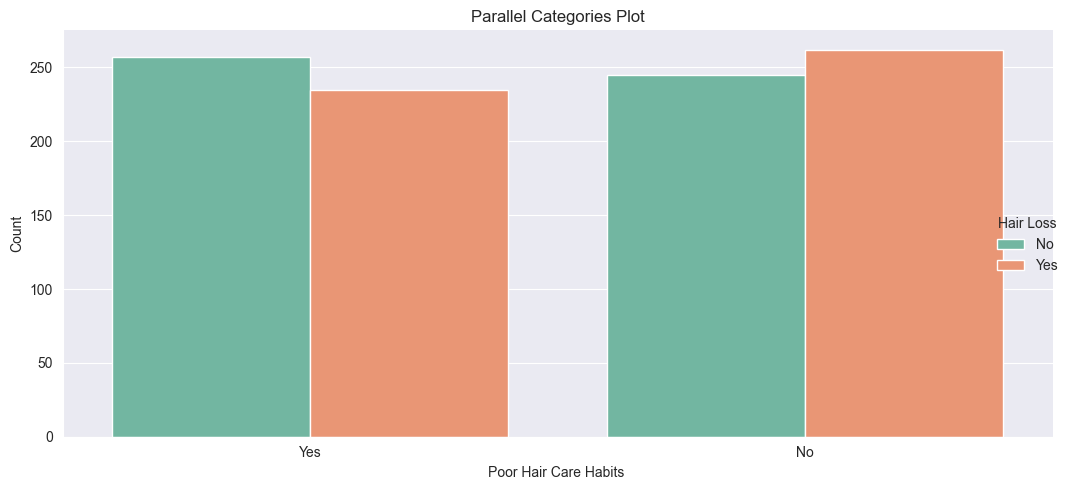

In [105]:
plt.figure(figsize=(4, 2))
sns.catplot(data=data_eda, kind='count', x=categorical_features[6], hue=categorical_features[10], aspect=2, palette='Set2')

plt.xlabel(categorical_features[6])
plt.ylabel("Count")
plt.title("Parallel Categories Plot")

plt.tight_layout()
plt.show()

In [106]:
pd.crosstab(data[categorical_features[6]],data[categorical_features[10]])

Hair Loss,0,1
Poor Hair Care Habits,,
No,245,262
Yes,257,235


<Figure size 400x200 with 0 Axes>

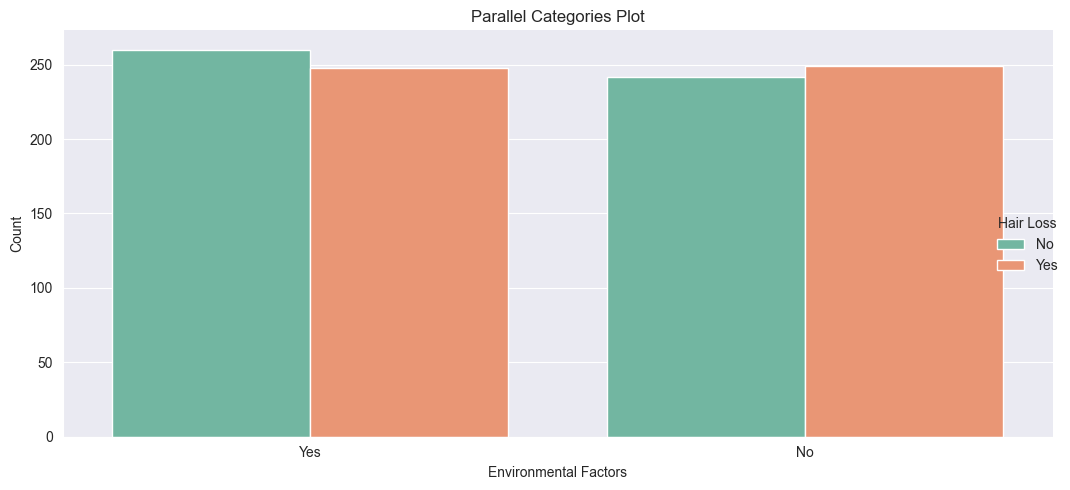

In [107]:
plt.figure(figsize=(4, 2))
sns.catplot(data=data_eda, kind='count', x=categorical_features[7], hue=categorical_features[10], aspect=2, palette='Set2')

plt.xlabel(categorical_features[7])
plt.ylabel("Count")
plt.title("Parallel Categories Plot")

plt.tight_layout()
plt.show()

In [110]:
pd.crosstab(data[categorical_features[7]],data[categorical_features[10]])

Hair Loss,0,1
Environmental Factors,,
No,242,249
Yes,260,248


<Figure size 400x200 with 0 Axes>

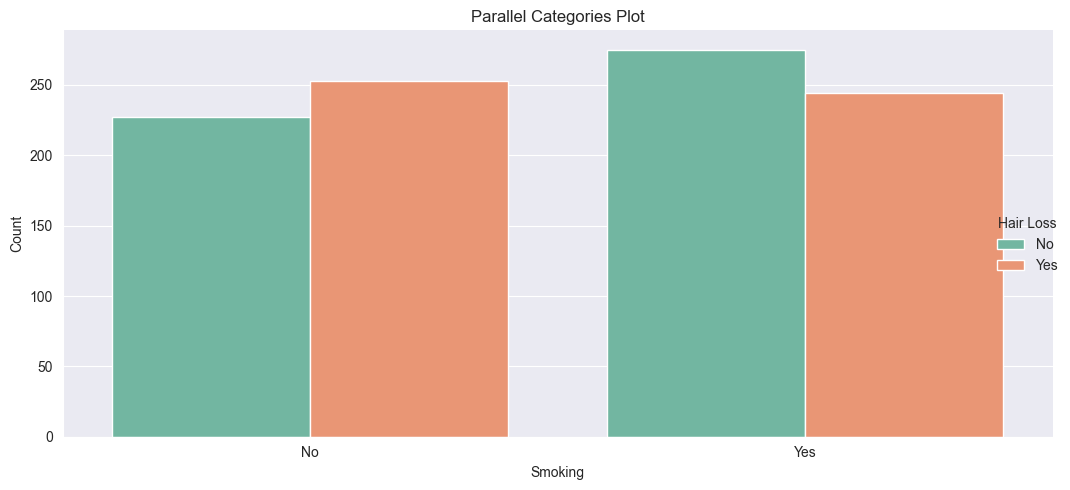

In [108]:
plt.figure(figsize=(4, 2))
sns.catplot(data=data_eda, kind='count', x=categorical_features[8], hue=categorical_features[10], aspect=2, palette='Set2')

plt.xlabel(categorical_features[8])
plt.ylabel("Count")
plt.title("Parallel Categories Plot")

plt.tight_layout()
plt.show()

In [111]:
pd.crosstab(data[categorical_features[8]],data[categorical_features[10]])

Hair Loss,0,1
Smoking,,
No,227,253
Yes,275,244


<Figure size 400x200 with 0 Axes>

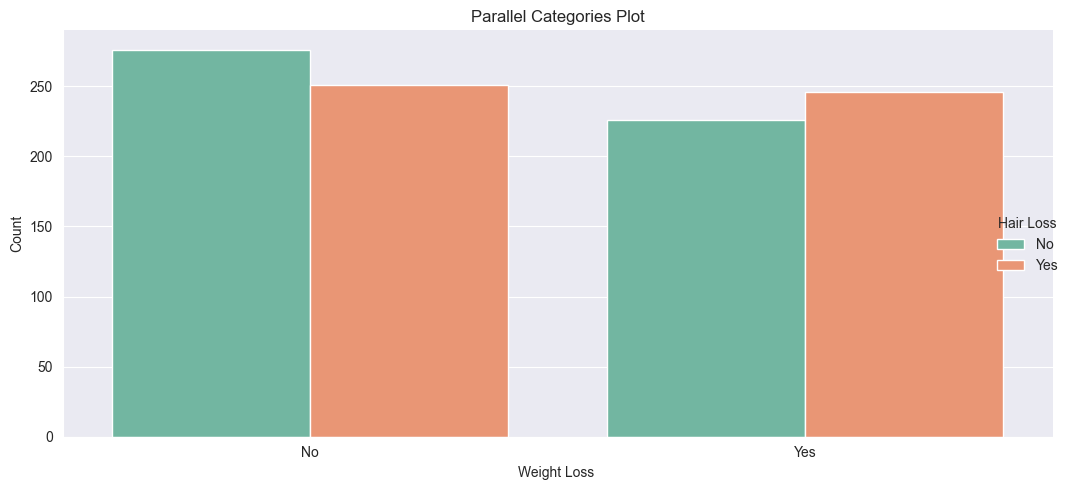

In [109]:
plt.figure(figsize=(4, 2))
sns.catplot(data=data_eda, kind='count', x=categorical_features[9], hue=categorical_features[10], aspect=2, palette='Set2')

plt.xlabel(categorical_features[9])
plt.ylabel("Count")
plt.title("Parallel Categories Plot")

plt.tight_layout()
plt.show()

In [112]:
pd.crosstab(data[categorical_features[9]],data[categorical_features[10]])

Hair Loss,0,1
Weight Loss,,
No,276,251
Yes,226,246


In [140]:
train_df = data.iloc[:, :12].copy()
train_df.head(10)

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
5,Yes,No,Psoriasis,Antibiotics,Magnesium deficiency,Low,37,No,Yes,No,Yes,1
6,Yes,Yes,No Data,No Data,Selenium deficiency,High,40,Yes,No,No,No,1
7,Yes,No,Dermatosis,Chemotherapy,Omega-3 fatty acids,High,35,Yes,No,Yes,No,0
8,Yes,No,Eczema,Steroids,Selenium deficiency,Moderate,19,No,No,Yes,Yes,1
9,No,Yes,Ringworm,Rogaine,Magnesium deficiency,Moderate,49,Yes,Yes,Yes,No,0


In [141]:
le=LabelEncoder()
for i in categorical_features[:-1]:
    train_df[i]=le.fit_transform(train_df[i])

In [142]:
train_df.head(10)

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,1,0,5,8,2,2,19,1,1,0,0,0
1,0,0,4,1,2,0,43,1,1,0,0,0
2,0,0,3,3,5,2,26,1,1,0,1,0
3,1,1,7,1,0,2,46,1,1,0,0,0
4,0,0,6,0,1,2,30,0,1,1,0,1
5,1,0,6,1,2,1,37,0,1,0,1,1
6,1,1,5,8,6,0,40,1,0,0,0,1
7,1,0,3,5,4,0,35,1,0,1,0,0
8,1,0,4,10,6,2,19,0,0,1,1,1
9,0,1,7,9,2,2,49,1,1,1,0,0


In [143]:
x = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values

In [148]:
y.shape

(999,)

In [149]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [150]:
x

array([[1. , 0. , 0.5, ..., 1. , 0. , 0. ],
       [0. , 0. , 0.4, ..., 1. , 0. , 0. ],
       [0. , 0. , 0.3, ..., 1. , 0. , 1. ],
       ...,
       [0. , 1. , 0.1, ..., 0. , 1. , 1. ],
       [0. , 1. , 0.2, ..., 1. , 1. , 1. ],
       [1. , 1. , 0.6, ..., 1. , 0. , 0. ]])

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [177]:
def training(model, names, ax):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = accuracy_score(pred, y_test)
    report = classification_report(pred, y_test)
    cm = confusion_matrix(pred, y_test)
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_title("{}: {}%".format(names, round(score*100, 2)))
    return report

In [178]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier(learning_rate=0.1)
gbc = GradientBoostingClassifier(learning_rate=0.9)
etc = ExtraTreesClassifier()
lgr = LogisticRegression()
svc = SVC(C=0.9)
gnb = GaussianNB()
xgb = XGBClassifier(learning_rate=0.9)

models = [rfc, abc, gbc, etc,
         lgr, svc, gnb, xgb]

names = ["Random Forest", "Ada Boost", "Gradient Boost", "Extra Trees", 
        "Logistic Regression", "Support Vectors", "Naive Bayes", "XGB"]

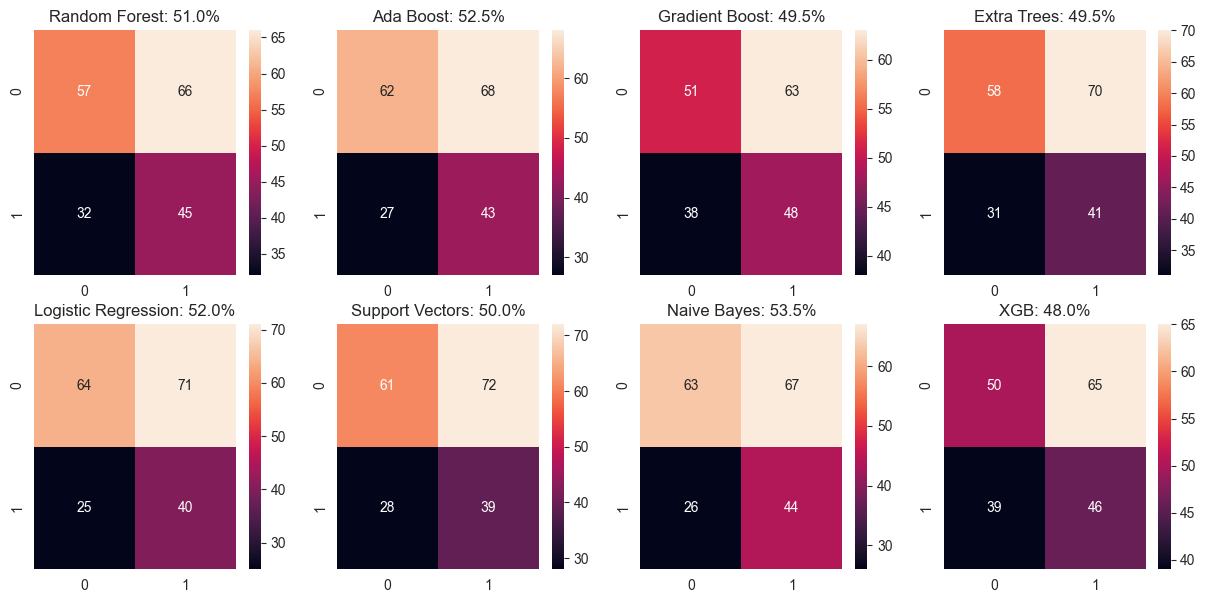

In [179]:
reports = dict()
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
row = 0
col = 0
for i, j in zip(models, names):
    if col >= 4:
        col = 0
        row += 1
    reports[j] = training(i, j, axes[row][col])
    col += 1

In [181]:
for i, j in reports.items():
    print("*"*50)
    print(i)
    print(j)
    print()
    

**************************************************
Random Forest
              precision    recall  f1-score   support

           0       0.64      0.47      0.54       121
           1       0.42      0.59      0.49        79

    accuracy                           0.52       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.55      0.52      0.52       200


**************************************************
Ada Boost
              precision    recall  f1-score   support

           0       0.70      0.48      0.57       130
           1       0.39      0.61      0.48        70

    accuracy                           0.53       200
   macro avg       0.54      0.55      0.52       200
weighted avg       0.59      0.53      0.53       200


**************************************************
Gradient Boost
              precision    recall  f1-score   support

           0       0.57      0.45      0.50       114
           1       0.43      0.56      0.49